<a href="https://colab.research.google.com/github/theeye1980/11podvi/blob/master/chapter3/multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [5]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [6]:
!wget --no-check-certificate \
    https://panel.ingalyatsii.ru/ml/lights_learn.zip \
    -O /tmp/lights_learn.zip
  
!wget --no-check-certificate \
    https://panel.ingalyatsii.ru/ml/lights_test.zip \
    -O /tmp/lights_test.zip

--2021-07-23 11:49:59--  https://panel.ingalyatsii.ru/ml/lights_learn.zip
Resolving panel.ingalyatsii.ru (panel.ingalyatsii.ru)... 92.53.96.116, 2a03:6f00:1::5c35:60a7
Connecting to panel.ingalyatsii.ru (panel.ingalyatsii.ru)|92.53.96.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 171768855 (164M) [application/zip]
Saving to: ‘/tmp/lights_learn.zip’

/tmp/lights_learn.z 100%[===================>] 163.81M  52.1MB/s    in 3.1s    

2021-07-23 11:50:03 (52.1 MB/s) - ‘/tmp/lights_learn.zip’ saved [171768855/171768855]

--2021-07-23 11:50:03--  https://panel.ingalyatsii.ru/ml/lights_test.zip
Resolving panel.ingalyatsii.ru (panel.ingalyatsii.ru)... 92.53.96.116, 2a03:6f00:1::5c35:60a7
Connecting to panel.ingalyatsii.ru (panel.ingalyatsii.ru)|92.53.96.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50757152 (48M) [application/zip]
Saving to: ‘/tmp/lights_test.zip’

/tmp/lights_test.zi 100%[===================>]  48.41M  61.2MB/s    

In [7]:
import os
import zipfile

local_zip = '/tmp/lights_learn.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/lights_test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [8]:
rock_dir = os.path.join('/tmp/lights_learn/cell')
paper_dir = os.path.join('/tmp/lights_learn/nastol')
scissors_dir = os.path.join('/tmp/lights_learn/podves')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 2307
total training paper images: 914
total training scissors images: 3410
['49932.png', 'CL225145R_citilux.png', '8210327_spot_light.png', '94227_eglo.png', '56210-4.png', '94178_eglo.png', '5941_mantra.png', 'OML-29117-03_omnilux.png', '95627_eglo.png', 'CL123161_citilux.png']
['58169.png', '632033301_mw_light.png', 'SL984.704.01_st_luce.png', 'FR5108TL-01N_freya.png', '7081331_spot_light.png', '94342_eglo.png', '98109_eglo.png', '58374.png', 'SL258.404.03_st_luce.png', 'SL998.664.01_st_luce.png']
['5530311D_britop.png', '39139_eglo.png', 'T432-PL-01-G_maytoni.png', '42504-5H.png', 'A4176SP-1BK.png', 'LSP-8347_lussole.png', '78374~50~36_lucide.png', 'A6586LM-8BK.png', 'SL407.303.01_st_luce.png', 'TL1186H-01WH_toplight.png']


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [10]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/lights_learn"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=4,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/lights_test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(300,300),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(300,300),
	class_mode='categorical'
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=5, validation_data = validation_generator, verbose = 1)

model.save("rps.h5")


Found 6631 images belonging to 3 classes.
Found 2139 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 128)       0         
______________________________________

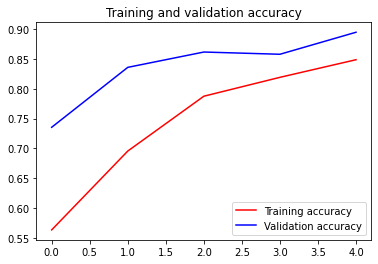

<Figure size 432x288 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [13]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving 781-103-03_velante.png to 781-103-03_velante.png
Saving 0783_mantra.png to 0783_mantra.png
Saving 783-106-01_velante.png to 783-106-01_velante.png
Saving 783-106-03_velante.png to 783-106-03_velante.png
Saving 784-106-01_velante.png to 784-106-01_velante.png
Saving 784-106-03_velante.png to 784-106-03_velante.png
Saving 826~5-Dorato_idlamp.png to 826~5-Dorato_idlamp.png
Saving 880-806-02_velante.png to 880-806-02_velante.png
Saving 900_mantra.png to 900_mantra.png
Saving 0931_mantra.png to 0931_mantra.png
Saving 0932_mantra.png to 0932_mantra.png
781-103-03_velante.png
[[0. 0. 1.]]
0783_mantra.png
[[1. 0. 0.]]
783-106-01_velante.png
[[0. 0. 1.]]
783-106-03_velante.png
[[0. 0. 1.]]
784-106-01_velante.png
[[0. 0. 1.]]
784-106-03_velante.png
[[0. 0. 1.]]
826~5-Dorato_idlamp.png
[[0. 0. 1.]]
880-806-02_velante.png
[[0. 0. 1.]]
900_mantra.png
[[5.9874446e-16 0.0000000e+00 1.0000000e+00]]
0931_mantra.png
[[0. 0. 1.]]
0932_mantra.png
[[0. 0. 1.]]
